# Libraries

In [ ]:
#@title
!pip install kneed

In [ ]:
#@title
import requests,\
        pandas,\
        seaborn,\
        matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import plotly.express as px
import statsmodels.api as sm
from scipy import stats
from kneed import KneeLocator
from scipy.stats import norm, skew
seaborn.set_theme(style="darkgrid")

# Mounting drive storage

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd /content/drive/MyDrive/PY4BD/data-analysis/drugs 


Mounted at /content/drive
/content/drive/MyDrive/PY4BD/data-analysis/drugs


# I. Drug poisoning data

cdc.svg

## Description


*   YEAR : year of survey 1999,2005,2014-2020
*   STATE : surveyed state
*   RATE  : Number of deaths from drug poisoning for 100 000 people
*   DEATHS: Total number of deaths in state



In [226]:
#@title
url = 'https://www.cdc.gov/nchs/pressroom/sosmap/drug_poisoning_mortality/Drug_Overdose.json'
poisoning = pandas.DataFrame(requests.get(url).json()['data']).drop('URL',axis=1)
poisoning.sort_values('RATE')

,YEAR,STATE,RATE,DEATHS
440,1999,SD,0.0,17
433,1999,ND,0.0,12
383,2005,ND,0.0,12
414,1999,IA,1.9,53
426,1999,NE,2.3,39
...,...,...,...,...
147,2018,WV,51.5,856
247,2016,WV,52.0,884
97,2019,WV,52.8,870
197,2017,WV,57.8,974


Text(0.5, 1.0, 'Death rate Per Year')

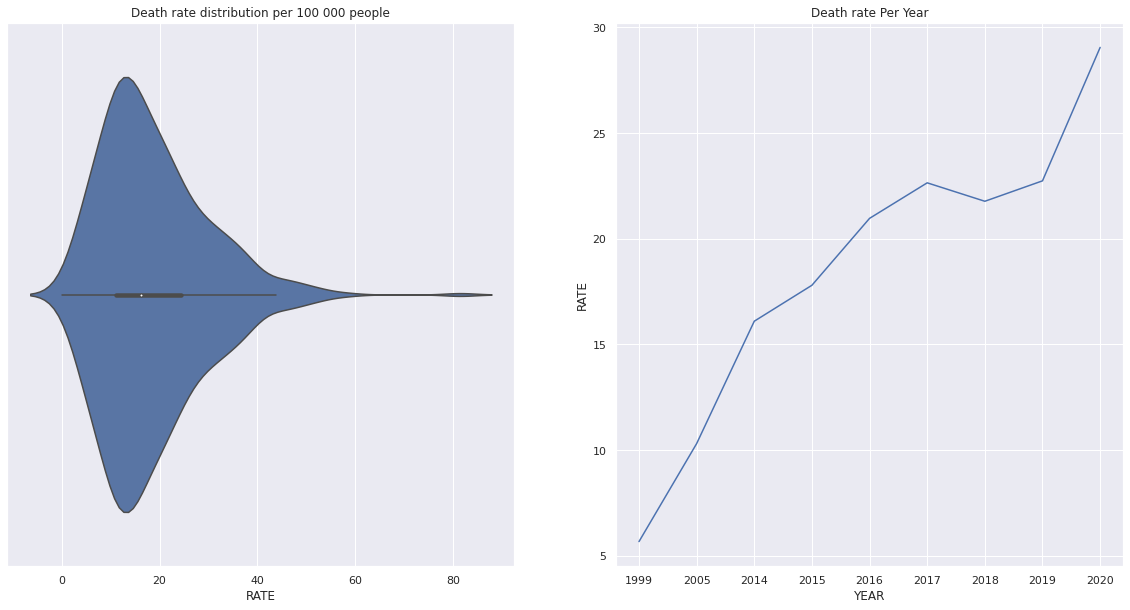

In [ ]:
#@title
fig,ax = plt.subplots(  1,2)
fig.set_size_inches(20, 10)
seaborn.violinplot(x=poisoning.RATE,ax=ax[0]).set_title('Death rate distribution per 100 000 people')
seaborn.lineplot(x="YEAR", y="RATE",data=poisoning.groupby('YEAR').RATE.mean().reset_index(),ax=ax[1]).set_title('Death rate Per Year')

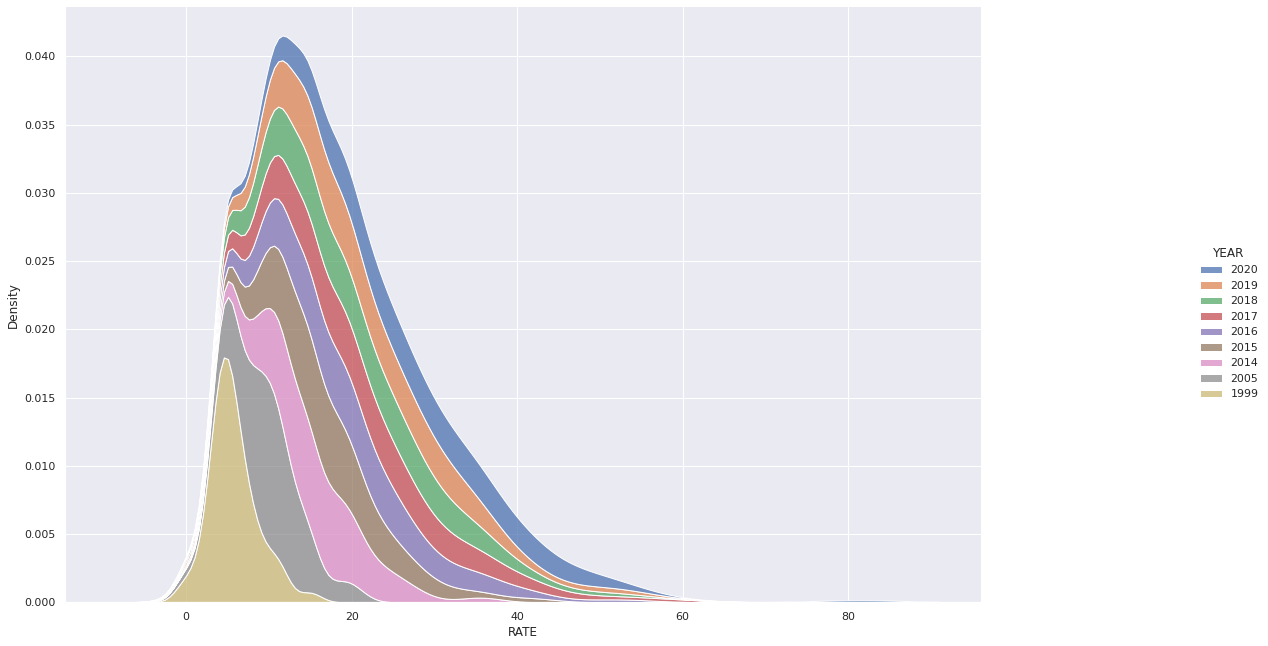

In [ ]:
#@title
fig = seaborn.displot(data=poisoning, x="RATE", hue="YEAR", kind="kde", multiple="stack")
fig._figure.set_size_inches(20, 10)


In [ ]:
#@title
poisoning['RATE_LEVEL'] = pandas.cut(poisoning.RATE,[poisoning.RATE.min(),5,10,22,40,poisoning.RATE.max()],
           labels=["RATE <=5","5<RATE<=10","10<RATE<=22","22<RATE<=40","RATE>40"])

In [ ]:
#@title
poisoning.to_csv('drugs.csv',index=None)

In [ ]:
#@title
#drive.flush_and_unmount()

In [ ]:
#@title
%%HTML
<iframe width="1000" height="700" src="https://lookerstudio.google.com/embed/reporting/d4fe932d-403a-4127-8bc6-0720d238e0bf/page/Vj1FD" frameborder="0" style="border:0" allowfullscreen></iframe>

# II. Commuting mode(United States Department of Transportation)

In [ ]:
#@title
#https://www.bts.gov/browse-statistical-products-and-data/state-transportation-statistics/commute-mode
american_community_survey = 'https://explore.dot.gov/vizql/w/STScommutemode/v/PieChart/tempfile/sessions/77B397889FE34EBFAB465270D4A5B63C-4:2/?key=2073140734&keepfile=yes&attachment=yes'

commute = pandas.read_excel(american_community_survey)

In [ ]:
#@title
commute.State = commute.State.fillna(method='ffill')

In [ ]:
commute

,State,Mode,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Alabama,Bicycle,0.001190,0.001478,0.001123,0.000979,0.001697,0.000871,0.001028,0.001008,0.000702,0.001395,NaN,0.001007
1,Alabama,Carpool,0.100059,0.099343,0.094800,0.085340,0.085645,0.089849,0.080385,0.084985,0.078673,0.086711,0.078361,0.076353
2,Alabama,Drove alone,0.844724,0.848534,0.852861,0.863611,0.858900,0.854975,0.861186,0.856648,0.862995,0.851668,0.813695,0.805017
3,Alabama,Public transportation,0.004080,0.004776,0.004108,0.004836,0.004123,0.003015,0.003085,0.003543,0.003377,0.004155,0.003475,0.002299
4,Alabama,"Taxi, motorcycle, or other",0.008121,0.008864,0.009290,0.009511,0.009687,0.008596,0.009286,0.008525,0.008889,0.009844,0.018707,0.009658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,Wyoming,Drove alone,0.759469,0.777491,0.757484,0.770565,0.768019,0.773100,0.777556,0.779409,0.757981,0.769142,0.764088,0.758941
367,Wyoming,Public transportation,0.016984,0.015440,0.015314,0.015314,0.016148,0.021970,0.015198,0.005914,0.012289,0.011630,0.005585,0.007940
368,Wyoming,"Taxi, motorcycle, or other",0.011905,0.013346,0.012174,0.015266,0.012454,0.010700,0.007100,0.012893,0.012088,0.006872,0.056464,0.010295
369,Wyoming,Walked,0.043567,0.034036,0.032454,0.045664,0.035678,0.045943,0.046082,0.036203,0.042615,0.029524,NaN,0.033565


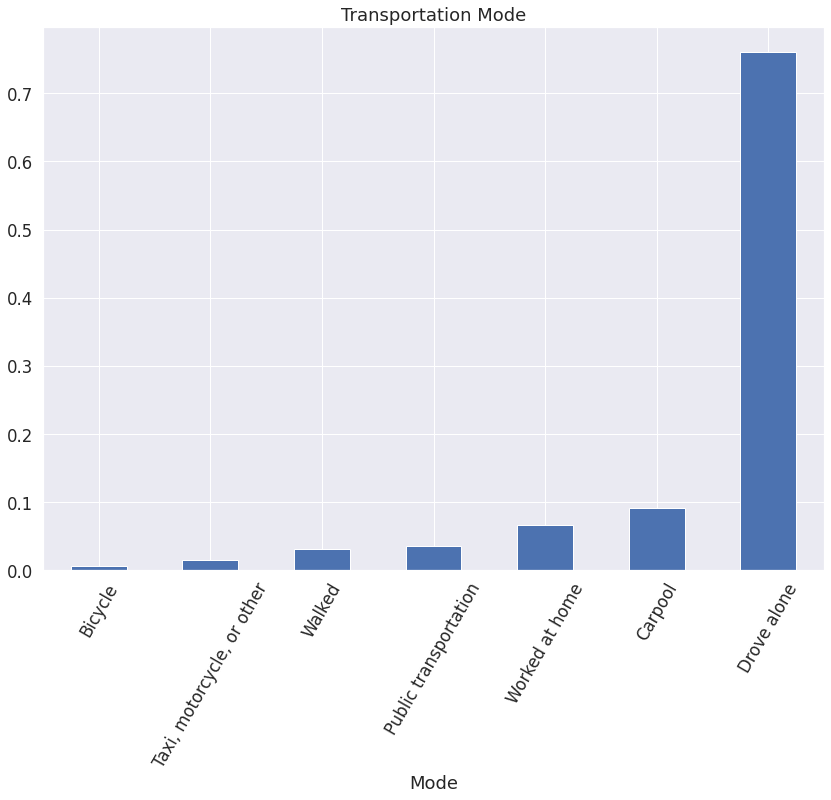

In [ ]:
commute.groupby('Mode').mean().mean(axis=1).sort_values().plot(kind='bar',rot=60,figsize=(14,10),title='Transportation Mode')

In [ ]:
#@title
commute = commute.sort_values(['State','Mode']).reset_index(drop=True)

In [ ]:
#@title
rename_df = lambda Df : Df.rename(columns={c:i-1 for i,c in enumerate(Df)})
commute_   = commute.groupby(['State']).apply(
                 lambda t : rename_df(
                     t.iloc[:,2:].T.pipe(
                         lambda D : D.reset_index().set_index([[t.State.iloc[0]]*len(D)])
                         )
                     )
      ).rename(columns=commute.Mode.iloc[:8].to_dict())

In [ ]:
#@title
commute_ = commute_[commute_[-1].astype(int) >2013]
commute_

-1   Bicycle   Carpool  Drove alone  Public transportation  \
State                                                                           
Alabama Alabama  2014  0.001697  0.085645     0.858900               0.004123   
        Alabama  2015  0.000871  0.089849     0.854975               0.003015   
        Alabama  2016  0.001028  0.080385     0.861186               0.003085   
        Alabama  2017  0.001008  0.084985     0.856648               0.003543   
        Alabama  2018  0.000702  0.078673     0.862995               0.003377   
...               ...       ...       ...          ...                    ...   
Wyoming Wyoming  2017  0.010629  0.102029     0.779409               0.005914   
        Wyoming  2018  0.011340  0.101517     0.757981               0.012289   
        Wyoming  2019  0.010432  0.115136     0.769142               0.011630   
        Wyoming  2020       NaN  0.085414     0.764088               0.005585   
        Wyoming  2021  0.007510  0.092258     0.758941               0.007940   

                 Taxi, motorcycle, or other    Walked  Worked at home  
State                                                                  
Alabama Alabama                    0.009687  0.011438        0.028511  
        Alabama                    0.008596  0.011001        0.031693  
        Alabama                    0.009286  0.011628        0.033402  
        Alabama                    0.008525  0.011557        0.033734  
        Alabama                    0.008889  0.010839        0.034526  
...                                     ...       ...             ...  
Wyoming Wyoming                    0.012893  0.036203        0.052922  
        Wyoming                    0.012088  0.042615        0.062170  
        Wyoming                    0.006872  0.029524        0.057264  
        Wyoming                    0.056464       NaN        0.088448  
        Wyoming                    0.010295  0.033565        0.089490  

[424 rows x 8 columns]

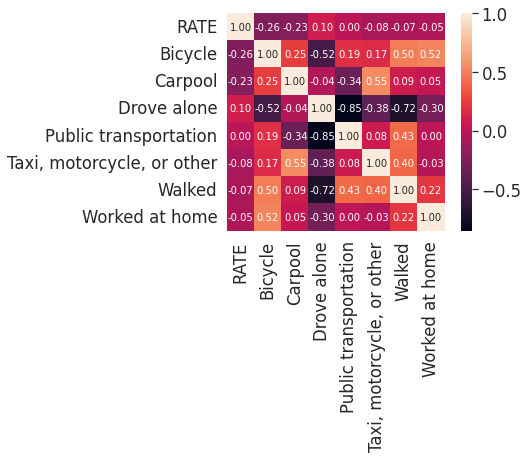

In [ ]:
#@title
corrmat = full_df.drop(['PC_0','PC_1'],axis=1).corr()

seaborn.set(font_scale=1.5)
hm = seaborn.heatmap(corrmat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})
plt.show()


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



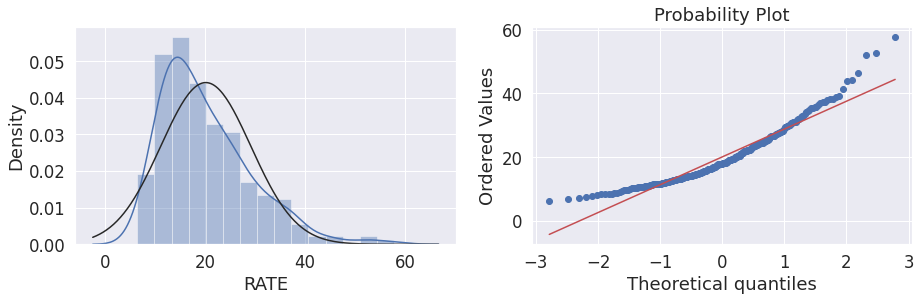

In [ ]:
fig = plt.figure(figsize=(15,4))
fig.add_subplot(121)
seaborn.distplot(full_df.RATE, fit=norm);
fig.add_subplot(122)
res = stats.probplot(full_df.RATE, plot=plt)

<ipython-input-209-e3aeb44b2bc0>:3: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

<ipython-input-209-e3aeb44b2bc0>:5: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



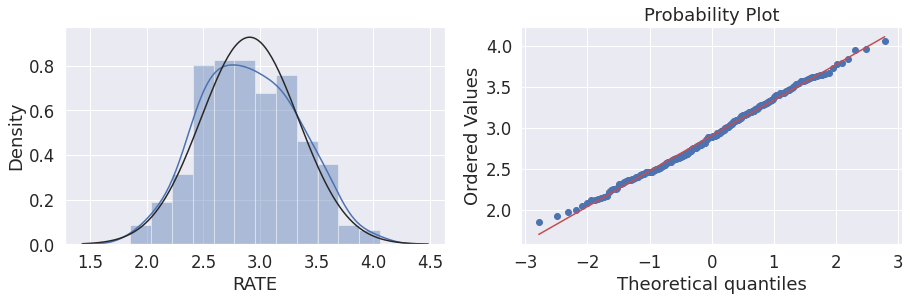

In [ ]:
fig = plt.figure(figsize=(15,4))
fig.add_subplot(121)
seaborn.distplot(pandas.np.log(full_df.RATE), fit=norm);
fig.add_subplot(122)
res = stats.probplot(pandas.np.log(full_df.RATE), plot=plt)

In [ ]:
#@title
full_df = groups.merge(commute__,left_on=['STATE_x','YEAR'],right_on=['State',-1])

In [ ]:
full_df.columns

Index([                      'PC_0',                       'PC_1',
                            'group',                    'STATE_x',
                             'YEAR',                 'STATE_CODE',
                          'STATE_y',                       'RATE',
                           'DEATHS',                      'State',
                          'level_1',                           -1,
                          'Bicycle',                    'Carpool',
                      'Drove alone',      'Public transportation',
       'Taxi, motorcycle, or other',                     'Walked',
                   'Worked at home'],
      dtype='object')

In [ ]:
model = sm.OLS(pandas.np.log(full_df.RATE),sm.add_constant(full_df[['Carpool']])).fit()




model.summary()

<ipython-input-210-769da29355b2>:1: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   RATE   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     11.65
Date:                Mon, 20 Feb 2023   Prob (F-statistic):           0.000746
Time:                        10:05:45   Log-Likelihood:                -142.46
No. Observations:                 258   AIC:                             288.9
Df Residuals:                     256   BIC:                             296.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5662      0.195     18.312      0.000       3.183       3.950
Carpool       -7.1974      2.109     -3.413      0.001     -11.350      -3.045
==============================================================================
Omnibus:                        1.808   Durbin-Watson:                   0.565
Prob(Omnibus):                  0.405   Jarque-Bera (JB):                1.531
Skew:                          -0.012   Prob(JB):                        0.465
Kurtosis:                       2.623   Cond. No.                         80.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

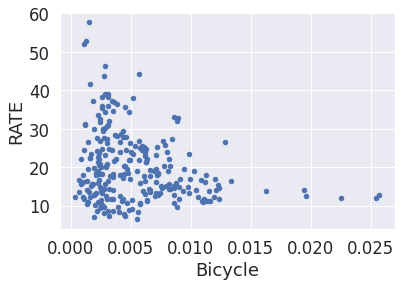

In [ ]:
full_df.plot(kind='scatter',x='Bicycle',y='RATE')


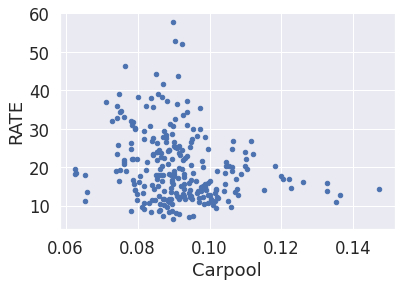

In [ ]:
full_df.plot(kind='scatter',x='Carpool',y='RATE')


## Regroupement des Etats par Mode de Transport

In [ ]:
#@title
commute__ = commute_.reset_index().query('State != "United States"').reset_index(drop=True).dropna()
commute__.shape

(359, 10)

In [ ]:
#@title
X_train = commute__.drop(['level_1',-1,'State'],axis=1).astype(float).fillna(0)

0.02352201846653744

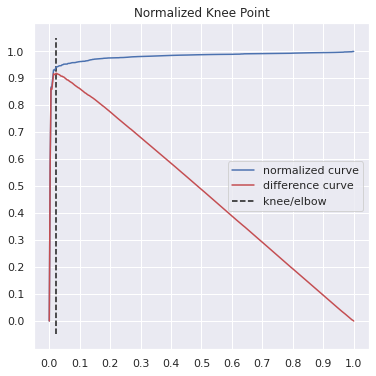

In [ ]:
#@title
euclid      = lambda x0,x1 : sum((x0-x1)**2)**0.5
all_dists   = lambda row,M,dist=euclid : [ (i,euclid(m,row[1])) for i,m in M]
min_dist    = lambda dists  : min(dists,key=lambda x : x[1])




all_min_dists = [
    
min_dist(all_dists((i,X_train.loc[i]),X_train.drop(i).iterrows()))

 for i,row in X_train.iterrows()

]

distances = pandas.DataFrame(all_min_dists).set_index(0).sort_values(1)

kneedle = KneeLocator(range(1,len(distances)+1),  #x values
                      distances[1].values, # y values
                      S=1.0, #parameter suggested from paper
                      curve="convex", #parameter from figure
                      direction="increasing") #parameter from figure




kneedle.plot_knee_normalized()



kneedle.knee_y

In [ ]:
#@title
state_codes = pandas.read_html('''<table class="table table-bordered responsive-utilities table-hover table-condensed mrgn-bttm-0">
<caption class="wb-inv">List of U.S. States with Codes and Abbreviations - Classification structure</caption>
<thead>
<tr>
<th scope="col" class="bg-tbl" id="un_1">Code</th>
<th scope="col" class="bg-tbl" id="un_2">State</th>
<th scope="col" class="bg-tbl" id="un_3">Abbreviation</th>
<th scope="col" class="bg-tbl" id="un_4">Alpha code</th>
</tr>
</thead>
<tbody>
<tr>
<th id="un_5" headers="un_1">01</th>
<td headers="un_5 un_2">Alabama</td>
<td headers="un_5 un_3">Ala.</td>
<td headers="un_5 un_4">AL</td>
</tr>
<tr>
<th id="un_6" headers="un_1">02</th>
<td headers="un_6 un_2">Alaska</td>
<td headers="un_6 un_3"></td>
<td headers="un_6 un_4">AK</td>
</tr>
<tr>
<th id="un_7" headers="un_1">04</th>
<td headers="un_7 un_2">Arizona</td>
<td headers="un_7 un_3">Ariz.</td>
<td headers="un_7 un_4">AZ</td>
</tr>
<tr>
<th id="un_8" headers="un_1">05</th>
<td headers="un_8 un_2">Arkansas</td>
<td headers="un_8 un_3">Ark.</td>
<td headers="un_8 un_4">AR</td>
</tr>
<tr>
<th id="un_9" headers="un_1">06</th>
<td headers="un_9 un_2">California</td>
<td headers="un_9 un_3">Calif.</td>
<td headers="un_9 un_4">CA</td>
</tr>
<tr>
<th id="un_10" headers="un_1">08</th>
<td headers="un_10 un_2">Colorado</td>
<td headers="un_10 un_3">Colo.</td>
<td headers="un_10 un_4">CO</td>
</tr>
<tr>
<th id="un_11" headers="un_1">09</th>
<td headers="un_11 un_2">Connecticut</td>
<td headers="un_11 un_3">Conn.</td>
<td headers="un_11 un_4">CT</td>
</tr>
<tr>
<th id="un_12" headers="un_1">10</th>
<td headers="un_12 un_2">Delaware</td>
<td headers="un_12 un_3">Del.</td>
<td headers="un_12 un_4">DE</td>
</tr>
<tr>
<th id="un_13" headers="un_1">11</th>
<td headers="un_13 un_2">District of Columbia</td>
<td headers="un_13 un_3">D.C.</td>
<td headers="un_13 un_4">DC</td>
</tr>
<tr>
<th id="un_14" headers="un_1">12</th>
<td headers="un_14 un_2">Florida</td>
<td headers="un_14 un_3">Fla.</td>
<td headers="un_14 un_4">FL</td>
</tr>
<tr>
<th id="un_15" headers="un_1">13</th>
<td headers="un_15 un_2">Georgia</td>
<td headers="un_15 un_3">Ga.</td>
<td headers="un_15 un_4">GA</td>
</tr>
<tr>
<th id="un_16" headers="un_1">15</th>
<td headers="un_16 un_2">Hawaii</td>
<td headers="un_16 un_3"></td>
<td headers="un_16 un_4">HI</td>
</tr>
<tr>
<th id="un_17" headers="un_1">16</th>
<td headers="un_17 un_2">Idaho</td>
<td headers="un_17 un_3"></td>
<td headers="un_17 un_4">ID</td>
</tr>
<tr>
<th id="un_18" headers="un_1">17</th>
<td headers="un_18 un_2">Illinois</td>
<td headers="un_18 un_3">Ill.</td>
<td headers="un_18 un_4">IL</td>
</tr>
<tr>
<th id="un_19" headers="un_1">18</th>
<td headers="un_19 un_2">Indiana</td>
<td headers="un_19 un_3">Ind.</td>
<td headers="un_19 un_4">IN</td>
</tr>
<tr>
<th id="un_20" headers="un_1">19</th>
<td headers="un_20 un_2">Iowa</td>
<td headers="un_20 un_3"></td>
<td headers="un_20 un_4">IA</td>
</tr>
<tr>
<th id="un_21" headers="un_1">20</th>
<td headers="un_21 un_2">Kansas</td>
<td headers="un_21 un_3">Kans.</td>
<td headers="un_21 un_4">KS</td>
</tr>
<tr>
<th id="un_22" headers="un_1">21</th>
<td headers="un_22 un_2">Kentucky</td>
<td headers="un_22 un_3">Ky.</td>
<td headers="un_22 un_4">KY</td>
</tr>
<tr>
<th id="un_23" headers="un_1">22</th>
<td headers="un_23 un_2">Louisiana</td>
<td headers="un_23 un_3"></td>
<td headers="un_23 un_4">LA</td>
</tr>
<tr>
<th id="un_24" headers="un_1">23</th>
<td headers="un_24 un_2">Maine</td>
<td headers="un_24 un_3">Me.</td>
<td headers="un_24 un_4">ME</td>
</tr>
<tr>
<th id="un_25" headers="un_1">24</th>
<td headers="un_25 un_2">Maryland</td>
<td headers="un_25 un_3">Md.</td>
<td headers="un_25 un_4">MD</td>
</tr>
<tr>
<th id="un_26" headers="un_1">25</th>
<td headers="un_26 un_2">Massachusetts</td>
<td headers="un_26 un_3">Mass.</td>
<td headers="un_26 un_4">MA</td>
</tr>
<tr>
<th id="un_27" headers="un_1">26</th>
<td headers="un_27 un_2">Michigan</td>
<td headers="un_27 un_3">Mich.</td>
<td headers="un_27 un_4">MI</td>
</tr>
<tr>
<th id="un_28" headers="un_1">27</th>
<td headers="un_28 un_2">Minnesota</td>
<td headers="un_28 un_3">Minn.</td>
<td headers="un_28 un_4">MN</td>
</tr>
<tr>
<th id="un_29" headers="un_1">28</th>
<td headers="un_29 un_2">Mississippi</td>
<td headers="un_29 un_3">Miss.</td>
<td headers="un_29 un_4">MS</td>
</tr>
<tr>
<th id="un_30" headers="un_1">29</th>
<td headers="un_30 un_2">Missouri</td>
<td headers="un_30 un_3">Mo.</td>
<td headers="un_30 un_4">MO</td>
</tr>
<tr>
<th id="un_31" headers="un_1">30</th>
<td headers="un_31 un_2">Montana</td>
<td headers="un_31 un_3">Mont.</td>
<td headers="un_31 un_4">MT</td>
</tr>
<tr>
<th id="un_32" headers="un_1">31</th>
<td headers="un_32 un_2">Nebraska</td>
<td headers="un_32 un_3">Nebr.</td>
<td headers="un_32 un_4">NE</td>
</tr>
<tr>
<th id="un_33" headers="un_1">32</th>
<td headers="un_33 un_2">Nevada</td>
<td headers="un_33 un_3">Nev.</td>
<td headers="un_33 un_4">NV</td>
</tr>
<tr>
<th id="un_34" headers="un_1">33</th>
<td headers="un_34 un_2">New Hampshire</td>
<td headers="un_34 un_3">N.H.</td>
<td headers="un_34 un_4">NH</td>
</tr>
<tr>
<th id="un_35" headers="un_1">34</th>
<td headers="un_35 un_2">New Jersey</td>
<td headers="un_35 un_3">N.J.</td>
<td headers="un_35 un_4">NJ</td>
</tr>
<tr>
<th id="un_36" headers="un_1">35</th>
<td headers="un_36 un_2">New Mexico</td>
<td headers="un_36 un_3">N.Mex.</td>
<td headers="un_36 un_4">NM</td>
</tr>
<tr>
<th id="un_37" headers="un_1">36</th>
<td headers="un_37 un_2">New York</td>
<td headers="un_37 un_3">N.Y.</td>
<td headers="un_37 un_4">NY</td>
</tr>
<tr>
<th id="un_38" headers="un_1">37</th>
<td headers="un_38 un_2">North Carolina</td>
<td headers="un_38 un_3">N.C.</td>
<td headers="un_38 un_4">NC</td>
</tr>
<tr>
<th id="un_39" headers="un_1">38</th>
<td headers="un_39 un_2">North Dakota</td>
<td headers="un_39 un_3"></td>
<td headers="un_39 un_4">ND</td>
</tr>
<tr>
<th id="un_40" headers="un_1">39</th>
<td headers="un_40 un_2">Ohio</td>
<td headers="un_40 un_3"></td>
<td headers="un_40 un_4">OH</td>
</tr>
<tr>
<th id="un_41" headers="un_1">40</th>
<td headers="un_41 un_2">Oklahoma</td>
<td headers="un_41 un_3">Okla.</td>
<td headers="un_41 un_4">OK</td>
</tr>
<tr>
<th id="un_42" headers="un_1">41</th>
<td headers="un_42 un_2">Oregon</td>
<td headers="un_42 un_3">Ore.</td>
<td headers="un_42 un_4">OR</td>
</tr>
<tr>
<th id="un_43" headers="un_1">42</th>
<td headers="un_43 un_2">Pennsylvania</td>
<td headers="un_43 un_3">Penn.</td>
<td headers="un_43 un_4">PA</td>
</tr>
<tr>
<th id="un_44" headers="un_1">44</th>
<td headers="un_44 un_2">Rhode Island</td>
<td headers="un_44 un_3">R.I.</td>
<td headers="un_44 un_4">RI</td>
</tr>
<tr>
<th id="un_45" headers="un_1">45</th>
<td headers="un_45 un_2">South Carolina</td>
<td headers="un_45 un_3">S.C.</td>
<td headers="un_45 un_4">SC</td>
</tr>
<tr>
<th id="un_46" headers="un_1">46</th>
<td headers="un_46 un_2">South Dakota</td>
<td headers="un_46 un_3"></td>
<td headers="un_46 un_4">SD</td>
</tr>
<tr>
<th id="un_47" headers="un_1">47</th>
<td headers="un_47 un_2">Tennessee</td>
<td headers="un_47 un_3">Tenn.</td>
<td headers="un_47 un_4">TN</td>
</tr>
<tr>
<th id="un_48" headers="un_1">48</th>
<td headers="un_48 un_2">Texas</td>
<td headers="un_48 un_3">Tex.</td>
<td headers="un_48 un_4">TX</td>
</tr>
<tr>
<th id="un_49" headers="un_1">49</th>
<td headers="un_49 un_2">Utah</td>
<td headers="un_49 un_3"></td>
<td headers="un_49 un_4">UT</td>
</tr>
<tr>
<th id="un_50" headers="un_1">50</th>
<td headers="un_50 un_2">Vermont</td>
<td headers="un_50 un_3">Vt.</td>
<td headers="un_50 un_4">VT</td>
</tr>
<tr>
<th id="un_51" headers="un_1">51</th>
<td headers="un_51 un_2">Virginia</td>
<td headers="un_51 un_3">Va.</td>
<td headers="un_51 un_4">VA</td>
</tr>
<tr>
<th id="un_52" headers="un_1">53</th>
<td headers="un_52 un_2">Washington</td>
<td headers="un_52 un_3">Wash.</td>
<td headers="un_52 un_4">WA</td>
</tr>
<tr>
<th id="un_53" headers="un_1">54</th>
<td headers="un_53 un_2">West Virginia</td>
<td headers="un_53 un_3">W.Va.</td>
<td headers="un_53 un_4">WV</td>
</tr>
<tr>
<th id="un_54" headers="un_1">55</th>
<td headers="un_54 un_2">Wisconsin</td>
<td headers="un_54 un_3">Wis.</td>
<td headers="un_54 un_4">WI</td>
</tr>
<tr>
<th id="un_55" headers="un_1">56</th>
<td headers="un_55 un_2">Wyoming</td>
<td headers="un_55 un_3">Wyo.</td>
<td headers="un_55 un_4">WY</td>
</tr>
</tbody>
</table>''')

In [ ]:
#@title
m = DBSCAN(eps=kneedle.knee_y, min_samples=5)
m.fit(X_train)


labels = list(map('group_{}'.format,m.labels_))





colors = dict(zip(set(labels),px.colors.qualitative.Dark24))
colors['group_-1'] = 'silver'

#@title
to_2D   = lambda X :  pandas.DataFrame(PCA(n_components=2).fit_transform(StandardScaler().fit_transform(X)),index=X.index).rename(columns='PC_{}'.format)
groups = to_2D(X_train).assign(group=labels,STATE=commute__.reset_index().State,YEAR=commute__.reset_index()[-1])


state_codes_match_dict = state_codes[0][['State','Alpha code']].set_index('State').to_dict()['Alpha code']
state_codes_match_dict

groups = groups.assign(STATE_CODE=lambda D : D.STATE.map(state_codes_match_dict))
groups = groups.merge(poisoning, how='inner',left_on=['STATE_CODE','YEAR'],right_on=['STATE','YEAR'])

averages = X_train.assign(group=labels,State=groups.STATE_x).reset_index().groupby('group').agg(
                            {'State':'count',
                             'Bicycle':'mean',
                             'Carpool':'mean',
                             'Drove alone':'mean', 
                             'Public transportation':'mean', 
                             'Taxi, motorcycle, or other':'mean', 
                             'Worked at home':'mean',
                             'Walked':'mean'}).sort_values('State').rename(columns={'State':'nobs'})
#@title
avgs = X_train.mean()
def signvars(g):
    get_Y = lambda g : list( (0,1)[x==g] for x in labels)
    success = False
    m = {}
    try:
        m     = sm.Logit(get_Y(g),X_train).fit()
        success = True
    except : pass
    return m,m if not success else m.pvalues.pipe(lambda V : V[V<.05]).to_dict()
def link(x):
        if 1 <= x < 2 :
            s = f'+{(x-1)*100:.1f}%'
        elif x > 2 :
            s = f'x{x:.1f}'
        elif .5 < x <= 1 :
            s = f'{(x-1)*100:.1f}%'
        elif x< .5:
            s = f'/{1/x:.1f}'
        return s
def summarize(row,pickedvars,agvs):
    for k in row.keys() :
        if k not in pickedvars:
            row[k]  =  '<br>-<br>'
        else:
            row[k]  = ( f'Avg : {row[k]:.1f}<br>'
                        f'Rprt: {link(row[k]/agvs[k])}<br>'
                        f'pval: {pickedvars[k]:.1f}'
                        )
    return row



averages_sign = pandas.concat([summarize(row,signvars(_id)[1],avgs) for _id,row in averages.iterrows()],axis=1).T.assign(nobs=averages.nobs)


In [ ]:
#@title
averages_sign.reset_index().merge( groups.groupby('group').RATE.mean().map(lambda x :f'Avg : {x:.1f}<br>{link(x/meanTot)}<br>'
                                                                        ),
                                  left_on='index',right_on='group').set_index('index').style

,nobs,Bicycle,Carpool,Drove alone,Public transportation,"Taxi, motorcycle, or other",Worked at home,Walked,RATE
index,,,,,,,,,
group_7,2,-,-,-,-,-,-,-,Avg : 14.4-28.6%
group_3,4,Avg : 0.0Rprt: -29.2%pval: 0.0,Avg : 0.1Rprt: -14.4%pval: 0.0,Avg : 0.7Rprt: -13.0%pval: 0.0,-,Avg : 0.0Rprt: -0.2%pval: 0.0,Avg : 0.2Rprt: x3.0pval: 0.0,-,Avg : 14.6-27.4%
group_4,5,-,-,-,-,-,-,-,Avg : 24.3+20.8%
group_1,6,-,-,-,-,-,-,-,Avg : 17.1-15.0%
group_2,6,Avg : 0.0Rprt: x2.3pval: 0.0,Avg : 0.1Rprt: +12.1%pval: 0.0,Avg : 0.7Rprt: -5.1%pval: 0.0,Avg : 0.1Rprt: +57.5%pval: 0.0,Avg : 0.0Rprt: +2.9%pval: 0.0,-,Avg : 0.0Rprt: +12.0%pval: 0.0,Avg : 20.7+2.9%
group_5,6,-,-,-,-,-,-,-,Avg : 15.2-24.6%
group_-1,11,-,Avg : 0.1Rprt: -12.4%pval: 0.0,Avg : 0.6Rprt: -23.4%pval: 0.0,-,-,Avg : 0.2Rprt: x3.0pval: 0.0,-,Avg : 20.5+1.9%
group_6,24,-,Avg : 0.1Rprt: -9.7%pval: 0.0,-,Avg : 0.1Rprt: x2.9pval: 0.0,-,-,Avg : 0.0Rprt: +9.9%pval: 0.0,Avg : 11.8-41.5%
group_0,162,-,-,-,-,-,-,-,Avg : 21.3+6.0%


In [ ]:
#@title
Gparams    = {'hover_data':['STATE_x','YEAR','RATE'],'color':'group','color_discrete_map':colors,'width':800,'height':600}

fig = px.scatter(
          groups, x='PC_0', y='PC_1',
          **Gparams)
fig.update_traces(**{'marker':{'size': 4}})
fig.show()

#Conclusions


1.    Le taux de mortalité sur 100 000 habitants de la consommation de stupéfiants continue sa progression malgré l'impression de maîtrise entre 2017-2019 . On note décallage net du taux modal(voir fig 3), lié peut-être à l'entrée d'une nouvelle substance
2.   Le mode de transport le plus répandu reste le fait de voyager seul en voiture
3.   Au premier abord,  des corrélations entre le taux de mortalité et des variables sociales comme l'usage du vélo ou le covoiturage pour se rendre au travail apparaissent mais on a pas pu les confirmer. Notamment de manière graphique
4.  On est parti sur l'hypothèse qu'il a des comportements hétérogène qu'on a cherché à mieux comprendre à travers des regroupements
5. On a indentifié quelques groupes d'Etats clés :    


*   Les Etats avec les plus faibles taux de mortalité ont 
    1.  un usage 3 fois plus élevé des transports publics 
    2. le covoiturage est 10% moins répandu
*   Le deuxième groupe le plus sujet aux overdoses fatals présente :    
    1.  Un usage du vélo 2 fois plus élevé que la normale
    2. Les gens s'y rendent au travail tout seul en voiture un peu moins souvent que la normale
    3. Ils sont à pieds 12% plus que la normale

Au final,on retient des comportements de groupes. Les modes de transport ne peuvent pas être utilisés comme des proxy linéaires de la mortalité suite à la consommation de stupéfiants. MAis, On observe des comportements localisés entre groupes d'Etats où on peut statuer de l'existance d'habitudes de transport propres.



